# Lab 2 - homework
### Hakkel Tamás - 2018.10.04.

That function predicts next value of time series by applying ordinary least squares method on the last `p` elements of array `data_array`.

In [5]:
def lsq(data_array, p):
    lines = list(data_array[-p-i:-i] for i in range(p+1))
    X = np.matrix(np.vstack(tuple(lines[1:])))
    theta = np.linalg.inv(X*X.T) * X * np.matrix(data_array[-p:]).T
    return theta.T*np.matrix(data_array[-p:]).T

That function calculates prediction and prediction error over the entire time series, and visualizes result.

In [6]:
def sliding_window_predictor(data_array, p):
    prediction = np.array([lsq(data_array[:i+2*p], p) for i in range(len(data_array)-2*p)])[:,0,0]
    n = len(data_array)
    error = prediction - data_array[2*p-1:n-1]
    t_pred = np.arange(2*p-1,n-1)
    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(data_array)
    ax1.plot(t_pred,prediction)
    ax1.legend(['original value', 'prediction'], loc=2)
    plt.xlabel('time')
    ax2.plot(t_pred, np.abs(error))
    ax2.legend(['absolute error'], loc=2)
    plt.show()
    print("""
    L1 norm: {:15.3f},
    L2 norm: {:15.3f},
    L∞ norm: {:15.3f},
    """.format(np.sum(np.abs(error)), np.sum(np.square(error)), np.sum(np.max(error))))

Data is strongly seasonal with period of 12, so that is why window size of 12 is the best predictor, and even 11-sized and 13-sized windows failed to predict the time series, but window of size 24 also gave acceptable result.

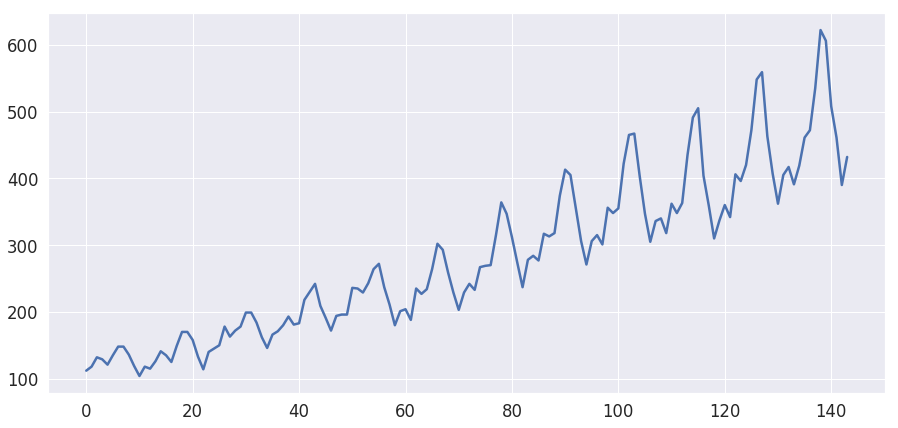

In [7]:
plt.plot(y);

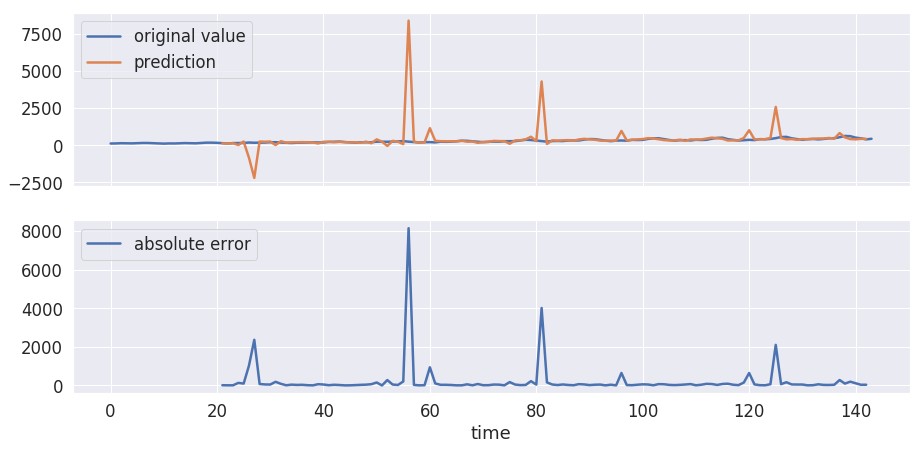


    L1 norm:       25914.170,
    L2 norm:    95822485.312,
    L∞ norm:        8142.076,
    


In [8]:
sliding_window_predictor(y,11)

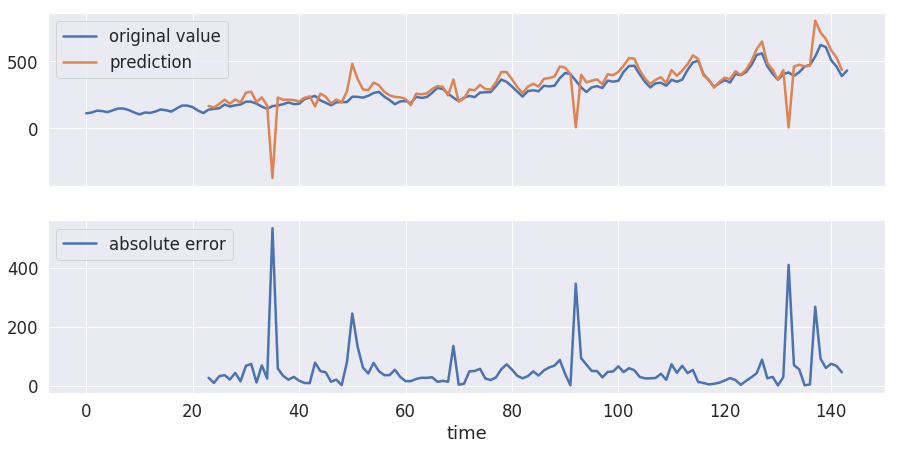


    L1 norm:        6360.212,
    L2 norm:      967520.571,
    L∞ norm:         268.255,
    


In [9]:
sliding_window_predictor(y,12)

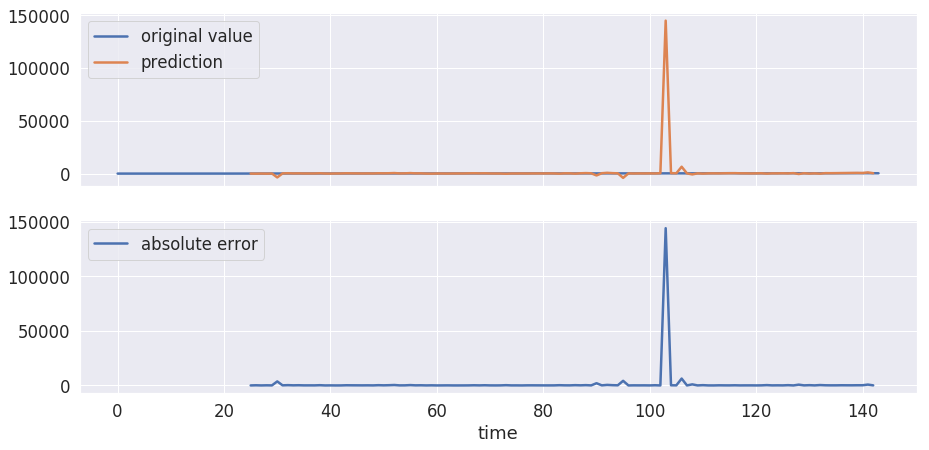


    L1 norm:      174883.478,
    L2 norm: 20911124566.176,
    L∞ norm:      144330.370,
    


In [10]:
sliding_window_predictor(y,13)

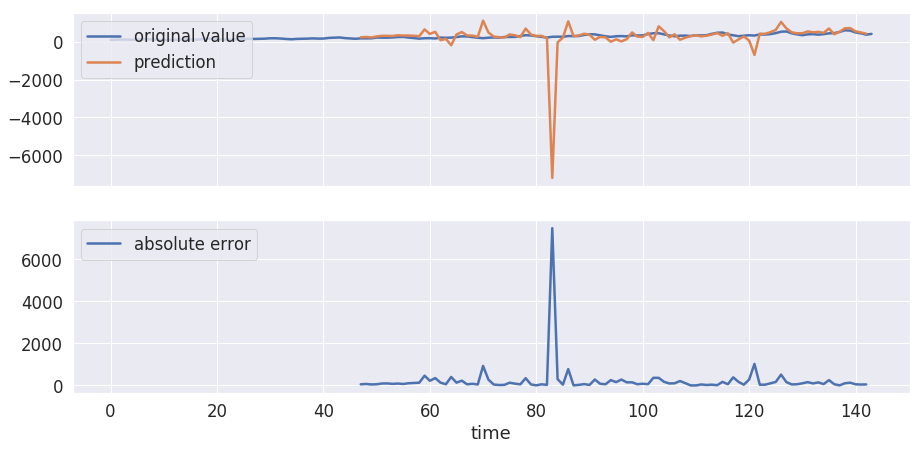


    L1 norm:       21821.124,
    L2 norm:    61151972.430,
    L∞ norm:         931.117,
    


In [11]:
sliding_window_predictor(y,24)